# DANE - połączenie i przygotowanie

In [4]:
import pandas as pd

df = pd.read_csv('../part1/data.csv')
df = df.dropna(subset=['value'])
df = df.drop(["Unnamed: 0"], axis=1)
df.columns = ['YEAR', 'MONTH', 'DAY','City','Type','Value']

In [5]:
df_w = pd.read_csv('../Data/average_daily_weather.csv')
#df = df.dropna(subset=['value'])
#df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
merged_df = pd.merge(df, df_w, on=['YEAR','MONTH','DAY','City'], how='inner')
merged_df
merged_df = merged_df.drop(["Humidity"], axis=1)
merged_df = merged_df.dropna()
merged_df

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind
0,2019,1,8,Warszawa,PM10,52.78,-2.6,3.0
1,2019,1,8,Warszawa,"PM2,5",35.56,-2.6,3.0
2,2019,1,9,Warszawa,PM10,43.53,-3.1,0.0
3,2019,1,9,Warszawa,"PM2,5",38.64,-3.1,0.0
4,2019,1,10,Warszawa,PM10,46.63,-6.8,2.5
...,...,...,...,...,...,...,...,...
24470,2021,2,14,Katowice,"PM2,5",33.20,-5.3,0.0
24471,2021,2,15,Katowice,"PM2,5",59.70,-7.1,1.5
24472,2021,2,16,Katowice,"PM2,5",54.90,-4.2,0.0
24473,2021,2,17,Katowice,"PM2,5",33.50,1.1,3.7


In [7]:
PM10 = merged_df[merged_df['Type']=='PM10']

In [8]:
# Stworzenie słownika mapującego nazwy miast na liczby całkowite
city_dict = {city: i+1 for i, city in enumerate(PM10['City'].unique())}
PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)
# Zamiana nazw miast na odpowiadające im liczby całkowite
PM10

/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_3425/3485538291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)


,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind
0,2019,1,8,1,PM10,52.78,-2.6,3.0
2,2019,1,9,1,PM10,43.53,-3.1,0.0
4,2019,1,10,1,PM10,46.63,-6.8,2.5
6,2019,1,11,1,PM10,53.70,-7.1,0.0
8,2019,1,12,1,PM10,25.76,0.9,2.7
...,...,...,...,...,...,...,...,...
24405,2021,12,25,5,PM10,28.00,-4.1,0.0
24407,2021,12,28,5,PM10,42.30,-4.7,2.9
24409,2021,12,29,5,PM10,45.60,-0.7,0.0
24411,2021,12,30,5,PM10,15.70,4.6,4.6


In [9]:
city_dict

{'Warszawa': 1, 'Wrocław': 2, 'Gdańsk': 3, 'Kraków': 4, 'Katowice': 5}

# RANDOM FOREST 

In [10]:
PM10_train = PM10[PM10['YEAR']<=2018]
PM10_test = PM10[PM10['YEAR']==2019]

In [11]:
PM10_train

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind
3480,2018,1,1,1,PM10,29.39,7.5,0.0
3482,2018,1,2,1,PM10,49.17,1.2,2.4
3484,2018,1,3,1,PM10,27.76,3.3,0.0
3486,2018,1,4,1,PM10,26.49,5.7,2.9
3488,2018,1,5,1,PM10,27.76,6.1,0.0
...,...,...,...,...,...,...,...,...
17257,2015,12,27,5,PM10,30.00,8.0,0.0
17259,2015,12,28,5,PM10,68.00,5.5,2.2
17261,2015,12,29,5,PM10,39.00,1.3,0.0
17263,2015,12,30,5,PM10,34.00,-5.1,4.0


In [12]:
from sklearn.ensemble import RandomForestRegressor

X=PM10_train[['City','Temperature','Wind','YEAR', 'MONTH']]
y=PM10_train['Value']


In [13]:
X_test=PM10_test[['City','Temperature','Wind','YEAR', 'MONTH']]
y_test=PM10_test['Value']

In [14]:
rf = RandomForestRegressor(max_depth= 10, max_features= 'log2', n_estimators= 150)
rf.fit(X, y)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=150)

In [15]:
y_predicted=rf.predict(X_test)

# Sprawdzenie trafności przewidywań modelu

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_predicted)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_predicted)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_predicted)
print("R2:", r2)

MSE: 332.60234266631437
MSE sqrt: 18.237388592293424
MAE: 12.853794608337274
R2: 0.3589750059932977


FileNotFoundError: [Errno 2] No such file or directory: 'Paula_RF_Plots/PM10_wszystkie_miasta.png'

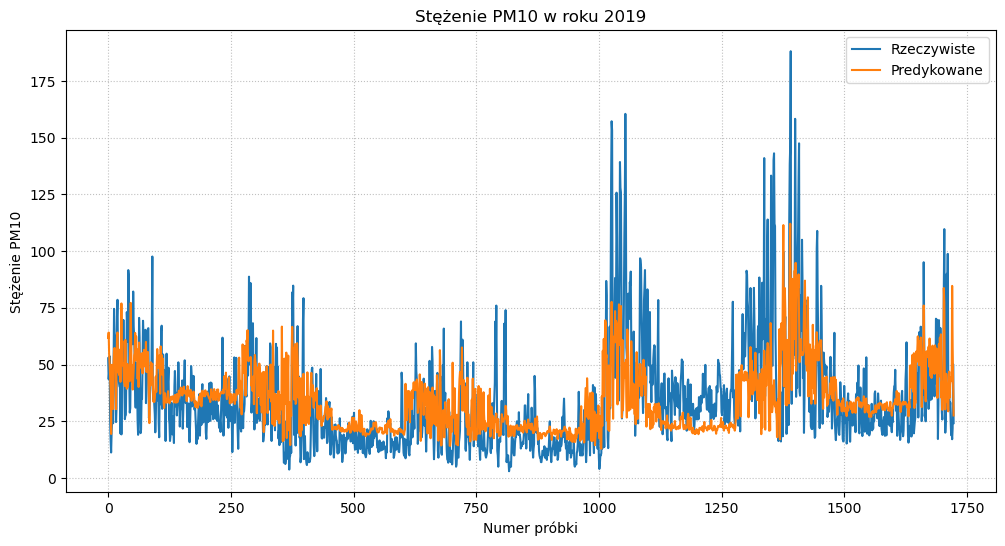

In [17]:

#Na wykresie true vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test.values, label='Rzeczywiste')
plt.plot(y_predicted, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.xlabel("Numer próbki")
plt.grid(color="silver",linestyle='dotted')
plt.title("Stężenie PM10 w roku 2019")
plt.legend()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/PM10_wszystkie_miasta.png', dpi=dpi_value)
plt.show()

In [ ]:
y_test.values

array([52.78, 43.53, 46.63, ..., 22.  , 50.2 , 24.2 ])

In [ ]:
len(y_predicted)

1724

In [ ]:
#Mean Absolute Percentage Error (MAPE)
import numpy as np
MAPE = (1/len(y_test)) * np.sum(abs((y_test - y_predicted)/y_test)) * 100
MAPE

49.96236459023153

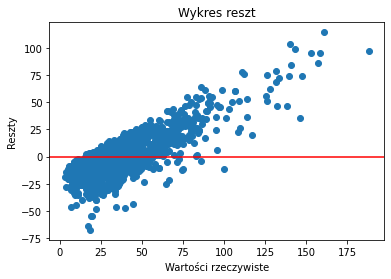

In [ ]:
residuals = y_test - y_predicted

# Wygenerowanie wykresu reszt
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Wykres reszt')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Reszty')
plt.show()

# Warszawa  

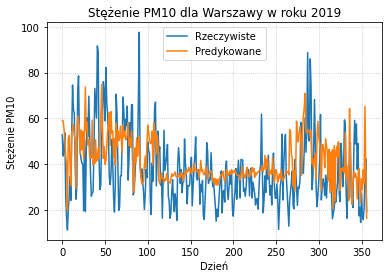

In [ ]:
#Warszawa!!!!
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_War=PM10_test.loc[PM10_test['City'] == 1]

y_test_War=PM10_test_War['Value']
X_test_War=PM10_test_War[['City','Temperature','Wind','YEAR','MONTH']]

y_pred_War=rf.predict(X_test_War)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_War.values, label='Rzeczywiste')
plt.plot(y_pred_War, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Warszawy w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/PM10_Warszawa.png', dpi=dpi_value)
plt.show()

In [ ]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_War, y_pred_War)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_War, y_pred_War)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_War, y_pred_War)
print("R2:", r2)

MSE: 218.11390826502054
MSE sqrt: 14.768679977067027
MAE: 11.544933747747354
R2: 0.08147126508013458


# Wrocław

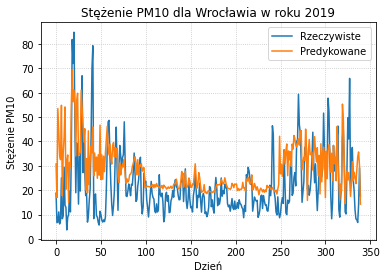

In [ ]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Wro=PM10_test.loc[PM10_test['City'] == 2]

y_test_Wro=PM10_test_Wro['Value']
X_test_Wro=PM10_test_Wro[['City','Temperature','Wind','YEAR','MONTH']]

y_pred_Wro=rf.predict(X_test_Wro)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Wro.values, label='Rzeczywiste')
plt.plot(y_pred_Wro, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Wrocławia w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/PM10_Wroclaw.png',dpi=dpi_value)
plt.show()

In [ ]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Wro, y_pred_Wro)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Wro, y_pred_Wro)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Wro, y_pred_Wro)
print("R2:", r2)

MSE: 164.7020398271975
MSE sqrt: 12.83362925392492
MAE: 9.821602299283317
R2: 0.027397566835867915


# Gdańsk

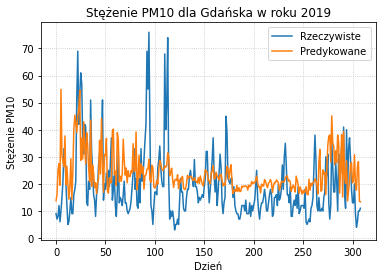

In [ ]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Gd=PM10_test.loc[PM10_test['City'] == 3]

y_test_Gd=PM10_test_Gd['Value']
X_test_Gd=PM10_test_Gd[['City','Temperature','Wind','YEAR','MONTH']]

y_pred_Gd=rf.predict(X_test_Gd)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Gd.values, label='Rzeczywiste')
plt.plot(y_pred_Gd, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Gdańska w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/PM10_Gdansk.png',dpi=dpi_value)
plt.show()

In [ ]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Gd, y_pred_Gd)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Gd, y_pred_Gd)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Gd, y_pred_Gd)
print("R2:", r2)

MSE: 144.81265394450963
MSE sqrt: 12.033812942891776
MAE: 9.414180400494859
R2: 0.05586887242007044


# Kraków

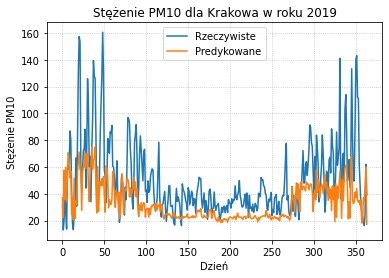

In [ ]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Krak=PM10_test.loc[PM10_test['City'] == 4]

y_test_Krak=PM10_test_Krak['Value']
X_test_Krak=PM10_test_Krak[['City','Temperature','Wind','YEAR','MONTH']]

y_pred_Krak=rf.predict(X_test_Krak)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Krak.values, label='Rzeczywiste')
plt.plot(y_pred_Krak, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Krakowa w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/PM10_Krakow.png',dpi=dpi_value)
plt.show()

In [ ]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Krak, y_pred_Krak)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Krak, y_pred_Krak)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Krak, y_pred_Krak)
print("R2:", r2)

MSE: 716.9741133583376
MSE sqrt: 26.77637229645453
MAE: 19.279273222967813
R2: 0.011632627848328525


# Katowice

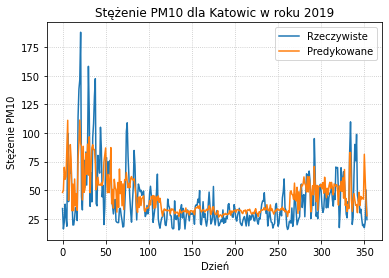

In [ ]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Kat=PM10_test.loc[PM10_test['City'] == 5]

y_test_Kat=PM10_test_Kat['Value']
X_test_Kat=PM10_test_Kat[['City','Temperature','Wind','YEAR','MONTH']]

y_pred_Kat=rf.predict(X_test_Kat)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Kat.values, label='Rzeczywiste')
plt.plot(y_pred_Kat, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Katowic w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/PM10_Katowice.png',dpi=dpi_value)
plt.show()

In [ ]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Kat, y_pred_Kat)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Kat, y_pred_Kat)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Kat, y_pred_Kat)
print("R2:", r2)

MSE: 355.4977682045583
MSE sqrt: 18.854648450834567
MAE: 12.998959633862961
R2: 0.422550850904055


# Feature importance based on mean decrease in impurity

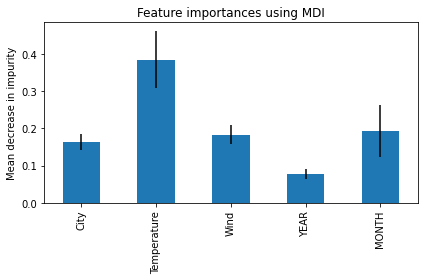

In [ ]:
import pandas as pd
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
feature_names = [ i for i in X_test.columns]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/Cechy_MDI',dpi=dpi_value)

In [ ]:
X_test.columns

Index(['City', 'Temperature', 'Wind', 'YEAR', 'MONTH'], dtype='object')

# Feature importance based on feature permutation

Elapsed time to compute the importances: 2.073 seconds


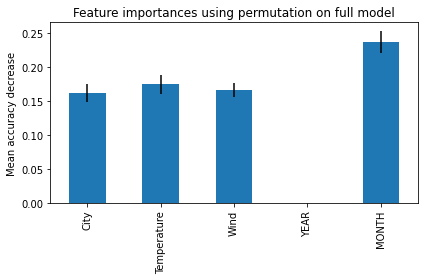

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
feature_names = [ i for i in X_test.columns]

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
dpi_value = 800 
plt.savefig('Paula_RF_Plots/Cechy_permutation', dpi=dpi_value)
plt.show()

# SVR - Epsilon-Support Vector Regression.

In [ ]:
X_test

,City,Temperature,Wind,YEAR,MONTH
0,1,-2.6,3.0,2019,1
2,1,-3.1,0.0,2019,1
4,1,-6.8,2.5,2019,1
6,1,-7.1,0.0,2019,1
8,1,0.9,2.7,2019,1
...,...,...,...,...,...
3384,5,1.7,0.0,2019,12
3386,5,-0.4,2.2,2019,12
3388,5,-1.0,0.0,2019,12
3390,5,0.1,3.7,2019,12


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X_test=PM10_test[['City','Temperature','Wind','YEAR', 'MONTH']]
svr = SVR()
svr.fit(X, y)
y_pred = svr.predict(X_test)

### SVR - ocena modelu 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 547.7633271326827
MSE sqrt: 23.404344193603944
MAE: 15.653732495699575
R2: -0.05570508216351566


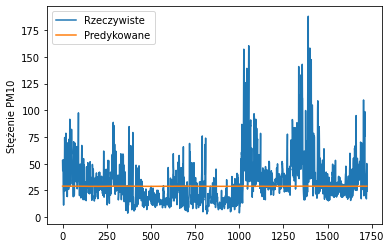

In [ ]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test.values, label='Rzeczywiste')
plt.plot(y_pred, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.legend()

In [ ]:
#Mean Absolute Percentage Error (MAPE)
import numpy as np
MAPE = (1/len(y_test)) * np.sum(abs((y_test - y_pred)/y_test)) * 100
MAPE

57.96429636058049